# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Read CSV

In [3]:
df = pd.read_csv("interactions.csv")
df.head()

,user_id,item_id,progress,rating,start_date
0,126706,14433,80,NaN,2018-01-01
1,127290,140952,58,NaN,2018-01-01
2,66991,198453,89,NaN,2018-01-01
3,46791,83486,23,5.0,2018-01-01
4,79313,188770,88,5.0,2018-01-01


In [4]:
df.isna().sum()

user_id          0
item_id          0
progress         0
rating        1675
start_date       0
dtype: int64

# Menghapus nilai null

In [5]:
df.dropna(inplace=True)

df.isna().sum()

user_id       0
item_id       0
progress      0
rating        0
start_date    0
dtype: int64

# Melihat deskripsi Modus,Mean,Median dari CSV

In [6]:
df.describe()

,user_id,item_id,progress,rating
count,336.000000,336.000000,336.000000,336.000000
mean,79634.208333,165574.511905,53.285714,4.583333
std,46498.011880,96088.453402,30.984376,0.820751
min,36.000000,1634.000000,0.000000,1.000000
25%,41548.750000,81800.250000,28.000000,4.000000
50%,81520.500000,176075.500000,52.500000,5.000000
75%,121394.000000,247703.500000,81.000000,5.000000
max,159500.000000,321524.000000,100.000000,5.000000


# Melihat Info CSV

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 3 to 2006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     336 non-null    int64  
 1   item_id     336 non-null    int64  
 2   progress    336 non-null    int64  
 3   rating      336 non-null    float64
 4   start_date  336 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


# Melihat Korelasi

In [8]:
df.corr()

,user_id,item_id,progress,rating
user_id,1.000000,0.001311,0.001046,-0.075634
item_id,0.001311,1.000000,0.009325,0.095316
progress,0.001046,0.009325,1.000000,-0.074303
rating,-0.075634,0.095316,-0.074303,1.000000


In [9]:
df.isna().sum()

user_id       0
item_id       0
progress      0
rating        0
start_date    0
dtype: int64

## EDA

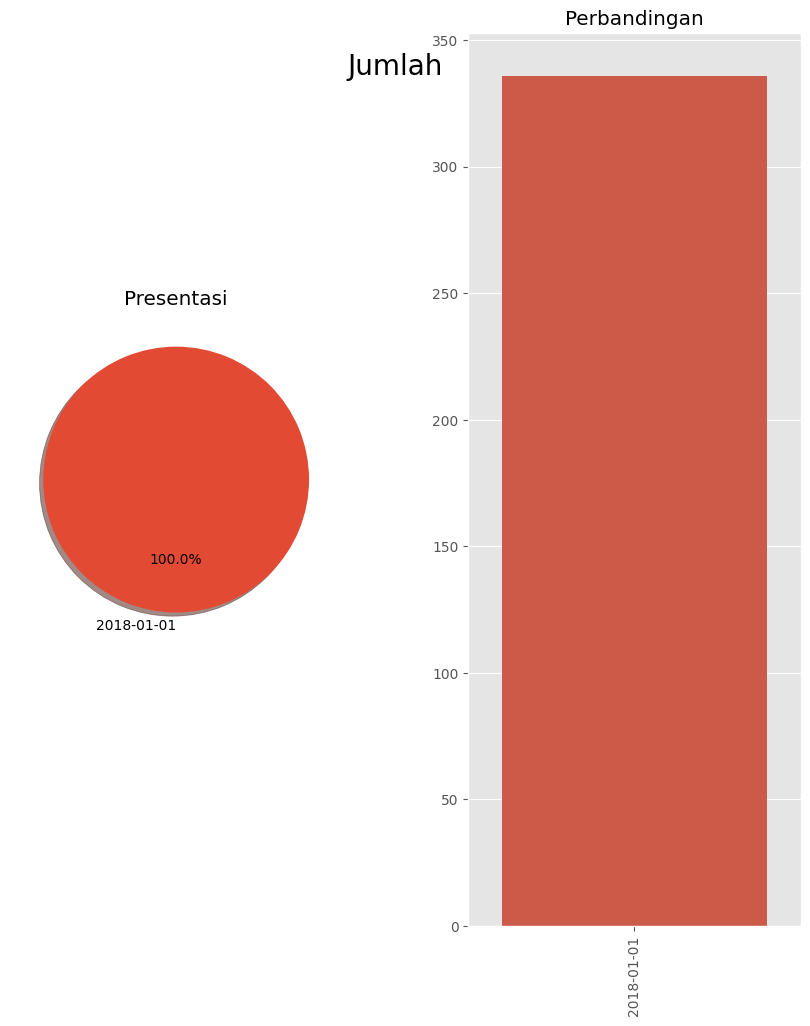

In [10]:
plt.style.use('ggplot')

category = df["start_date"].value_counts().reset_index()

fig, ax = plt.subplots(1,2, figsize=(10,10))
fig.tight_layout(pad=6.0)

ax[0].pie(category['start_date'], labels=category['index'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("Presentasi")

x_index = list(category['index'])
y_species = list(category['start_date'])
sns.barplot(x=x_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan")

fig.subplots_adjust(top=1.0)
plt.xticks(rotation=90)
plt.suptitle("Jumlah",size=20)
plt.show()

<Figure size 2000x2000 with 0 Axes>

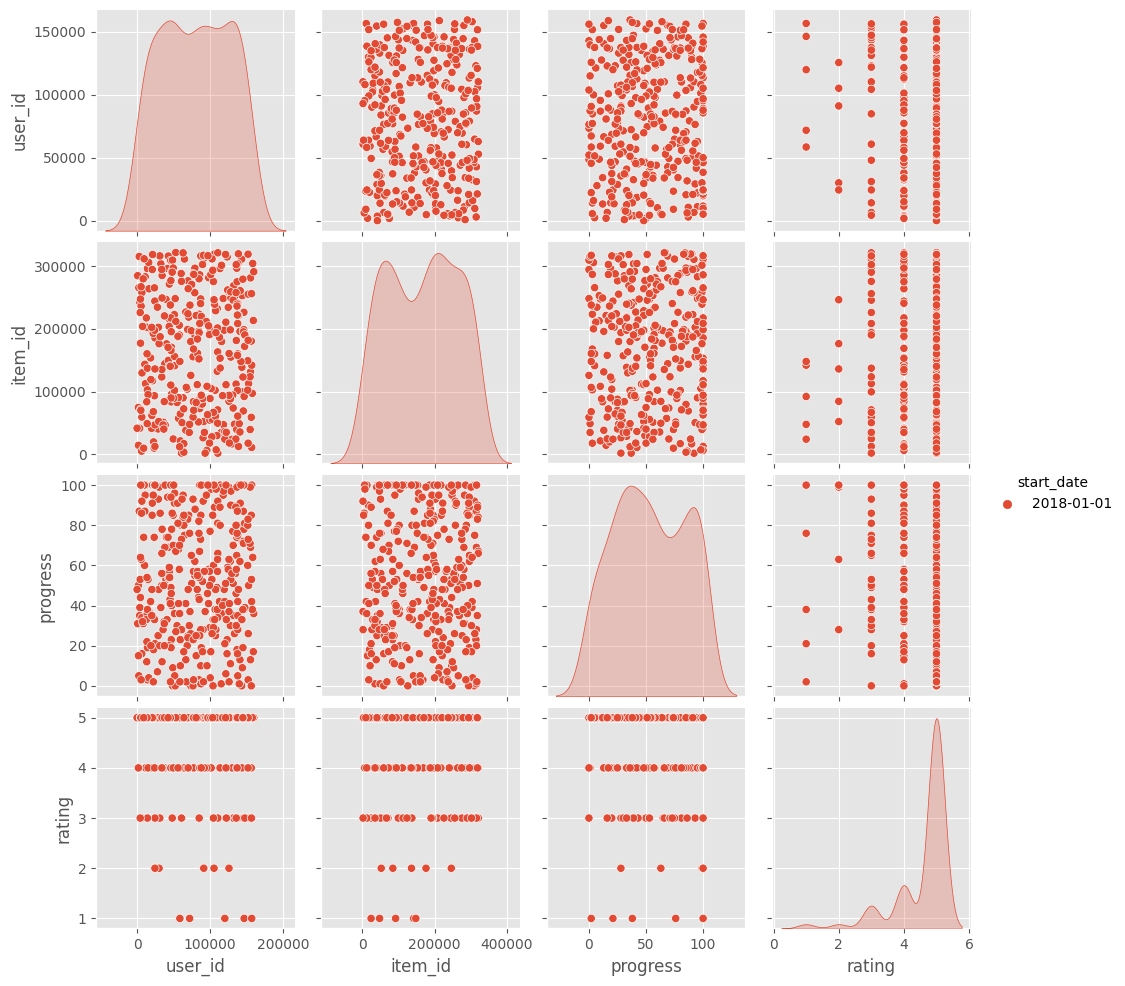

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue="start_date")
plt.show()

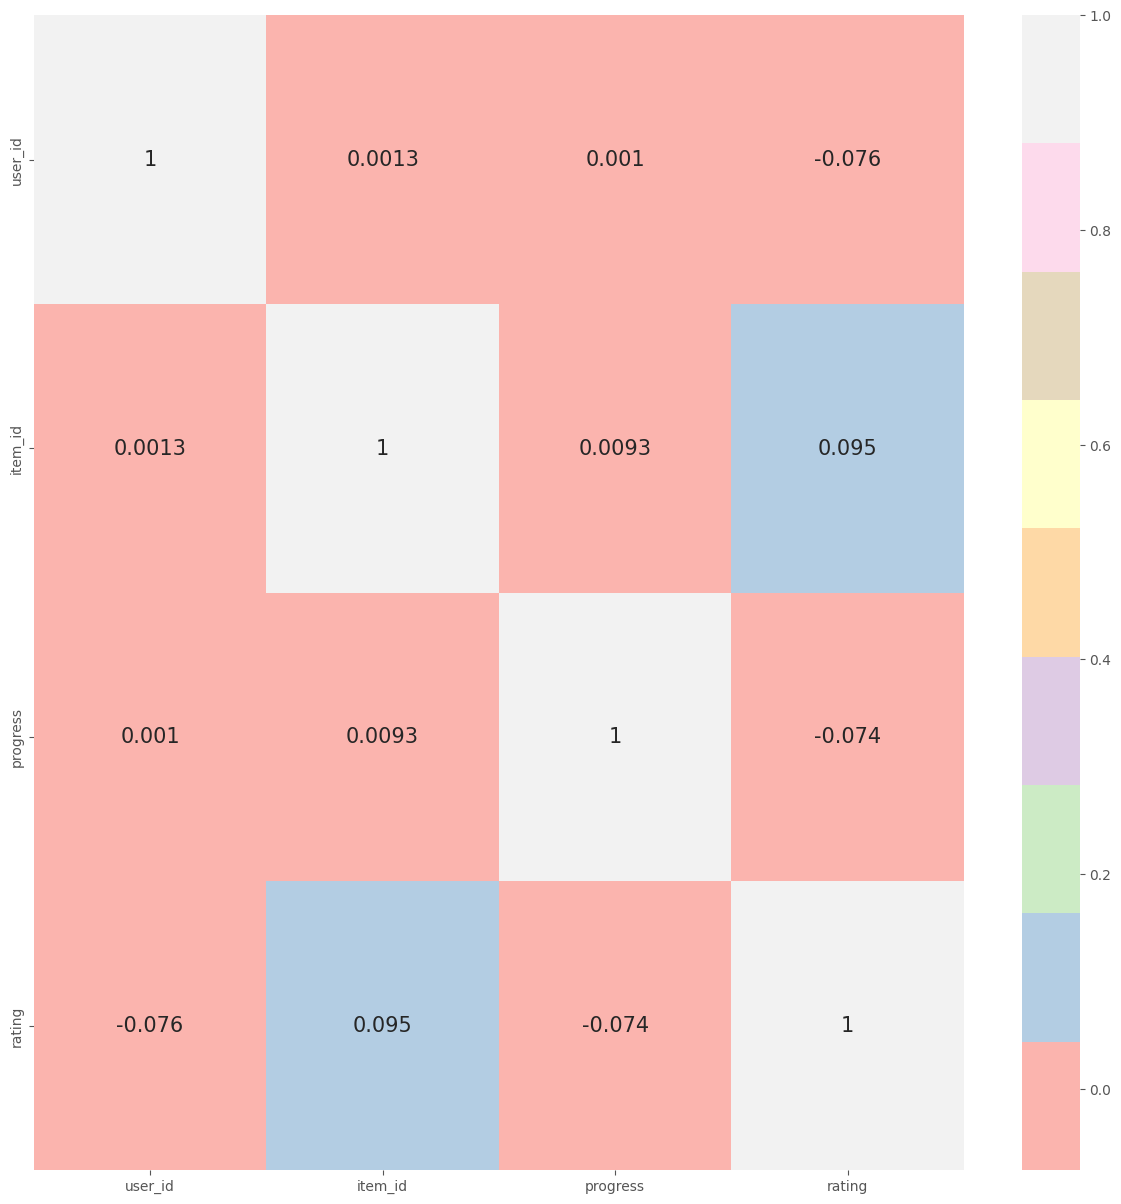

In [12]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),cmap='Pastel1',annot=True,annot_kws={"size":15})
plt.show()

# Klasifikasi

## Split Data

In [13]:
data = df[['user_id', 'item_id', 'progress', 'rating']]
label = df[['start_date']]

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.2)

# KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(data_train,label_train)

KNeighborsClassifier(n_neighbors=4)

In [15]:
predict_label = knn.predict(data_test)

In [16]:
hasil_akurasi = accuracy_score(label_test, predict_label)

In [17]:
print(" Hasil Akurasi algoritma Decision Tree :", {hasil_akurasi})

 Hasil Akurasi algoritma Decision Tree : {1.0}


# Decision Tree

In [18]:
dt = DecisionTreeClassifier()
dt.fit(data_train, label_train)

DecisionTreeClassifier()

In [19]:
predict_label = dt.predict(data_test)

In [20]:
hasil_akurasi = accuracy_score(label_test, predict_label)

In [21]:
print("Hasil Akurasi algoritma Decision Tree :", {hasil_akurasi})

Hasil Akurasi algoritma Decision Tree : {1.0}


# Naive Bayes

In [22]:
gnb  = GaussianNB()
gnb.fit(data_train,label_train)

GaussianNB()

In [23]:
predict_label = gnb.predict(data_test)

In [24]:
hasil_akurasi = accuracy_score(label_test, predict_label)

In [25]:
print("Hasil Akurasi dari Algoritma Naive Bayes : ", {hasil_akurasi})

Hasil Akurasi dari Algoritma Naive Bayes :  {1.0}


# Redresi Data

## Split Data

In [26]:
data, label = datasets.load_diabetes(return_X_y=True)
data = data[:, np.newaxis, 2]

data_train2 = data[:-50]
data_test2 = data[-50:]

label_train2 = label[:-50]
label_test2 = label[-50:]

# Linear Regresi

In [27]:
reg = LinearRegression()
reg.fit(data_train2,label_train2)

LinearRegression()

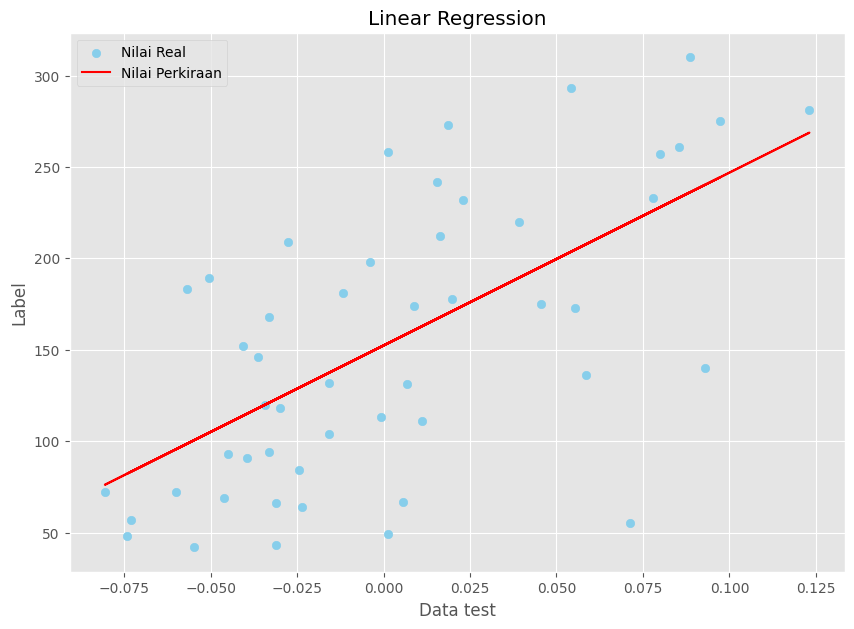

In [28]:
predict_label = reg.predict(data_test2)

plt.figure(figsize=(10,7))

plt.scatter(data_test2, label_test2, color="skyblue",label="Nilai Real")
plt.plot(data_test2, predict_label, color="red",label="Nilai Perkiraan")
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('Label')
plt.legend(loc ='upper left')
plt.show()